In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from google.colab import files
import shutil
import zipfile
import os

uploaded = files.upload()
for name in uploaded.keys():
    with zipfile.ZipFile(name, 'r') as zip_ref:
        zip_ref.extractall('/content')


Saving crossval.zip to crossval.zip
上传的文件: crossval.zip


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import os
import shutil
import random
from tqdm import tqdm
from sklearn.model_selection import KFold

# Paths (change according to your local setup)
dataset_root = r'C:\TUB\Projekt\Version2\Dataset'
images_path = os.path.join(dataset_root, 'images', 'train')
labels_path = os.path.join(dataset_root, 'labels', 'train')

# Test set output paths
test_images_path = os.path.join(dataset_root, 'test', 'images')
test_labels_path = os.path.join(dataset_root, 'test', 'labels')

# Cross-validation output base path
crossval_root = os.path.join(dataset_root, 'crossval')

# Parameters
num_folds = 3       # Number of folds for cross-validation
test_ratio = 0.1    # 10% of data will be used as a test set

# Create output folders if they don't exist
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(test_labels_path, exist_ok=True)
os.makedirs(crossval_root, exist_ok=True)

# Get all image files (.jpg or .png)
all_images = []
for file in os.listdir(images_path):
    if file.endswith('.jpg') or file.endswith('.png'):
        all_images.append(file)

# Create matching label filenames (.txt)
all_labels = []
for img_file in all_images:
    label_file = img_file.replace('.jpg', '.txt').replace('.png', '.txt')
    all_labels.append(label_file)

# Pair each image with its label
all_samples = list(zip(all_images, all_labels))

# Shuffle the data to ensure randomness
random.seed(42)
random.shuffle(all_samples)

# Split off 10% of data for the test set
num_test = int(len(all_samples) * test_ratio)
test_samples = all_samples[:num_test]
trainval_samples = all_samples[num_test:]

print(f"Total images: {len(all_samples)}")
print(f"Test set size: {len(test_samples)}")
print(f"Remaining for cross-validation: {len(trainval_samples)}")

# Copy test set files to test folder
for img_file, label_file in tqdm(test_samples, desc="Copying test set"):
    shutil.copy(os.path.join(images_path, img_file), os.path.join(test_images_path, img_file))
    shutil.copy(os.path.join(labels_path, label_file), os.path.join(test_labels_path, label_file))

# Extract only image names for cross-validation split
trainval_images = [img for img, lbl in trainval_samples]

# Split remaining data into K folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for fold_index, (train_idx, val_idx) in enumerate(kf.split(trainval_images)):
    # Define paths for this fold
    fold_path = os.path.join(crossval_root, f'fold_{fold_index}')
    train_img_out = os.path.join(fold_path, 'images', 'train')
    val_img_out = os.path.join(fold_path, 'images', 'val')
    train_lbl_out = os.path.join(fold_path, 'labels', 'train')
    val_lbl_out = os.path.join(fold_path, 'labels', 'val')

    # Create necessary folders
    os.makedirs(train_img_out, exist_ok=True)
    os.makedirs(val_img_out, exist_ok=True)
    os.makedirs(train_lbl_out, exist_ok=True)
    os.makedirs(val_lbl_out, exist_ok=True)

    # Copy training files
    for idx in train_idx:
        img_name = trainval_images[idx]
        label_name = img_name.replace('.jpg', '.txt').replace('.png', '.txt')
        shutil.copy(os.path.join(images_path, img_name), os.path.join(train_img_out, img_name))
        shutil.copy(os.path.join(labels_path, label_name), os.path.join(train_lbl_out, label_name))

    # Copy validation files
    for idx in val_idx:
        img_name = trainval_images[idx]
        label_name = img_name.replace('.jpg', '.txt').replace('.png', '.txt')
        shutil.copy(os.path.join(images_path, img_name), os.path.join(val_img_out, img_name))
        shutil.copy(os.path.join(labels_path, label_name), os.path.join(val_lbl_out, label_name))

    print(f"Fold {fold_index} completed.")

print("Data splitting completed.")



In [ ]:
from ultralytics import YOLO
import os

model_path = 'yolov8n.pt'

base_data_path = "crossval"
epochs = 50
imgsz = 640
batch = 16
device = 0

for fold in range(3):
    print(f"\n Training Fold {fold}...\n")

    data_yaml = os.path.join(base_data_path, f"fold_{fold}", f"data_fold_{fold}.yaml")
    model = YOLO(model_path)
    model.train(
        data=data_yaml,
        epochs=epochs,
        imgsz=imgsz,
        batch=batch,
        device=device,
        name=f"fold{fold}"
    )



🔁 正在训练 Fold 0...

Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=crossval/fold_0/data_fold_0.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fold06, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9.2±1.9 MB/s, size: 10.0 KB)


train: Scanning /content/crossval/fold_0/labels/train... 721 images, 0 backgrounds, 0 corrupt: 100%|██████████| 721/721 [00:00<00:00, 1725.46it/s]

train: New cache created: /content/crossval/fold_0/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3.3±1.7 MB/s, size: 9.9 KB)


val: Scanning /content/crossval/fold_0/labels/val... 361 images, 0 backgrounds, 0 corrupt: 100%|██████████| 361/361 [00:00<00:00, 702.11it/s]


val: New cache created: /content/crossval/fold_0/labels/val.cache
Plotting labels to runs/detect/fold06/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fold06
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.05G      1.715      3.117      1.925          2        640: 100%|██████████| 46/46 [00:14<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.51it/s]


                   all        361        361      0.997      0.333      0.816      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.29G      1.325      1.869      1.448          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]

                   all        361        361      0.559      0.693      0.588      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.3G      1.327      1.706      1.423          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.22it/s]

                   all        361        361       0.74      0.809      0.865       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.32G      1.298      1.523      1.386          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.99it/s]


                   all        361        361      0.736      0.858      0.846      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.34G      1.304       1.39      1.388          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.46it/s]

                   all        361        361      0.704      0.601      0.703       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.36G      1.282      1.271       1.39          1        640: 100%|██████████| 46/46 [00:13<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]

                   all        361        361       0.86      0.821      0.924      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.37G      1.207      1.159      1.339          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]

                   all        361        361      0.972      0.972      0.991      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.39G      1.212      1.108      1.338          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]

                   all        361        361      0.875      0.862      0.901      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.41G      1.221      1.071      1.342          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]

                   all        361        361      0.973      0.956      0.983      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.43G      1.201      1.035      1.318          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]

                   all        361        361      0.996      0.995      0.993      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.44G      1.194     0.9905      1.329          2        640: 100%|██████████| 46/46 [00:11<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        361        361      0.985      0.965      0.992      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.46G      1.177     0.9695      1.302          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]

                   all        361        361      0.874      0.929      0.985      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.48G      1.161     0.8874      1.295          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.14it/s]

                   all        361        361      0.992      0.985      0.993      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.49G       1.17     0.8666      1.308          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]

                   all        361        361      0.996      0.991      0.993      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.51G      1.135     0.8736      1.311          1        640: 100%|██████████| 46/46 [00:13<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]

                   all        361        361      0.989      0.968      0.993      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.53G      1.141     0.8303      1.276          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]

                   all        361        361      0.994      0.997      0.993      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.54G      1.112     0.7787      1.265          1        640: 100%|██████████| 46/46 [00:14<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]

                   all        361        361      0.992      0.996      0.994      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.56G      1.102     0.7794      1.253          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]

                   all        361        361      0.991      0.995      0.993      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.58G      1.087     0.7448      1.253          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.08it/s]

                   all        361        361      0.992      0.995      0.991       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       2.6G      1.116     0.8007      1.262          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]

                   all        361        361      0.983      0.995      0.993      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.61G      1.117     0.8158      1.274          1        640: 100%|██████████| 46/46 [00:12<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]

                   all        361        361      0.995      0.997      0.994      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.63G      1.114     0.7711      1.256          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        361        361      0.982      0.985      0.991      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.65G      1.068     0.7237      1.226          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]

                   all        361        361      0.992      0.992      0.994      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.66G      1.101     0.7609      1.271          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.20it/s]

                   all        361        361      0.996      0.997      0.993        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.68G      1.081     0.7476      1.244          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]

                   all        361        361      0.993      0.983      0.993      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.7G      1.097     0.7292      1.239          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.37it/s]

                   all        361        361      0.993      0.995      0.993      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.71G      1.089     0.7562      1.251          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]

                   all        361        361      0.993      0.992      0.992      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.73G      1.031     0.6806      1.227          2        640: 100%|██████████| 46/46 [00:11<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        361        361      0.995      0.997      0.994      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.75G      1.061     0.6793      1.222          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]

                   all        361        361      0.981      0.982      0.984      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.77G      1.041     0.6488      1.213          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]

                   all        361        361       0.99      0.994      0.994      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.78G      1.072     0.6618      1.233          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]

                   all        361        361      0.993      0.993      0.993      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.8G      1.025     0.6421      1.213          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]

                   all        361        361      0.993      0.993      0.993      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.82G     0.9979     0.6002      1.193          1        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]

                   all        361        361      0.989      0.987      0.993      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.83G      1.055      0.644      1.231          4        640: 100%|██████████| 46/46 [00:11<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]

                   all        361        361      0.993      0.995      0.994      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.85G      1.017     0.6191      1.204          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]

                   all        361        361      0.985      0.992      0.993      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.87G     0.9638     0.6026      1.175          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]

                   all        361        361      0.996      0.997      0.993      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.89G     0.9698     0.5954      1.179          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]

                   all        361        361      0.994      0.994      0.992      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       2.9G     0.9886     0.5989      1.204          2        640: 100%|██████████| 46/46 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]

                   all        361        361      0.992      0.995      0.992       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.92G     0.9742     0.5684      1.185          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]

                   all        361        361      0.996      0.997      0.994      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.94G     0.9877     0.6108      1.178          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]

                   all        361        361      0.993      0.995      0.993      0.736


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.95G     0.9249     0.4769       1.29          1        640: 100%|██████████| 46/46 [00:12<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.28it/s]

                   all        361        361      0.995      0.996      0.993      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.97G      0.893     0.4243      1.298          1        640: 100%|██████████| 46/46 [00:11<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.20it/s]

                   all        361        361      0.993      0.994      0.992      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.99G      0.887     0.4374      1.289          1        640: 100%|██████████| 46/46 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        361        361      0.993      0.995      0.993      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.01G     0.8527     0.4109      1.237          1        640: 100%|██████████| 46/46 [00:11<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.30it/s]

                   all        361        361      0.996      0.997      0.994      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.02G     0.8259     0.4071      1.244          1        640: 100%|██████████| 46/46 [00:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.34it/s]

                   all        361        361      0.991      0.995      0.993      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.04G      0.845      0.398      1.261          1        640: 100%|██████████| 46/46 [00:11<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]

                   all        361        361      0.991      0.995      0.993      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.06G     0.8225     0.4013      1.233          1        640: 100%|██████████| 46/46 [00:11<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]

                   all        361        361      0.993      0.995      0.992      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.07G      0.823     0.3885      1.225          1        640: 100%|██████████| 46/46 [00:10<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]

                   all        361        361      0.993      0.994      0.992      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.09G     0.7922     0.3828      1.218          1        640: 100%|██████████| 46/46 [00:10<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]

                   all        361        361      0.993      0.994      0.992       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.11G     0.7846     0.3751      1.199          1        640: 100%|██████████| 46/46 [00:12<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.38it/s]

                   all        361        361      0.992      0.995      0.993      0.741



50 epochs completed in 0.212 hours.
Optimizer stripped from runs/detect/fold06/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/fold06/weights/best.pt, 6.2MB

Validating runs/detect/fold06/weights/best.pt...
Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]


                   all        361        361      0.993      0.994      0.992       0.75
       right_eye_close        121        121      0.992       0.99      0.991      0.724
        right_eye_open        125        125      0.991      0.992      0.991      0.804
        left_eye_close        115        115      0.998          1      0.995      0.723
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/fold06

🔁 正在训练 Fold 1...

Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=crossval/fold_1/data_fold_1.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist

train: Scanning /content/crossval/fold_1/labels/train... 721 images, 0 backgrounds, 0 corrupt: 100%|██████████| 721/721 [00:00<00:00, 1658.75it/s]

train: New cache created: /content/crossval/fold_1/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.8±1.1 MB/s, size: 10.7 KB)


val: Scanning /content/crossval/fold_1/labels/val... 361 images, 0 backgrounds, 0 corrupt: 100%|██████████| 361/361 [00:00<00:00, 735.24it/s]


val: New cache created: /content/crossval/fold_1/labels/val.cache
Plotting labels to runs/detect/fold1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fold1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.23G      1.696      3.109        1.9          2        640: 100%|██████████| 46/46 [00:13<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]

                   all        361        361    0.00651          1      0.758       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.44G      1.354      1.946      1.458          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]


                   all        361        361      0.766       0.37      0.487      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.44G      1.322      1.654      1.413          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        361        361       0.86      0.859      0.924      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.44G      1.315      1.512      1.399          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]

                   all        361        361      0.469      0.763       0.68      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.44G      1.281      1.377      1.377          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]

                   all        361        361      0.837      0.877      0.936      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.44G      1.238      1.232      1.368          1        640: 100%|██████████| 46/46 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]

                   all        361        361      0.977      0.979      0.992       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.44G      1.209      1.115      1.324          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.51it/s]


                   all        361        361      0.971      0.961      0.979      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.44G      1.207      1.068      1.332          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]

                   all        361        361      0.973      0.988      0.992      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.45G      1.211      1.034      1.329          4        640: 100%|██████████| 46/46 [00:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]

                   all        361        361      0.972      0.974      0.986      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.47G      1.166      1.009      1.286          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]

                   all        361        361       0.95      0.945      0.971      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.49G      1.184     0.9789      1.322          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]

                   all        361        361      0.951      0.937      0.978      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.5G      1.211     0.9632       1.31          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.42it/s]

                   all        361        361      0.889      0.886      0.955      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.52G      1.138     0.8937      1.275          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]

                   all        361        361      0.815      0.733      0.843      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.54G      1.166     0.8705      1.283          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        361        361      0.952      0.964       0.98      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.55G      1.123     0.8155      1.309          1        640: 100%|██████████| 46/46 [00:12<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all        361        361      0.975       0.96      0.982      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.57G      1.111     0.7871      1.251          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]

                   all        361        361       0.93      0.873      0.957      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.59G      1.117     0.7947      1.272          1        640: 100%|██████████| 46/46 [00:12<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        361        361      0.983      0.983      0.991      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.61G       1.13     0.8077      1.279          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]

                   all        361        361       0.97      0.976      0.987      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.62G      1.111     0.7345       1.27          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]

                   all        361        361      0.985      0.985      0.993      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.64G      1.101     0.7579       1.26          4        640: 100%|██████████| 46/46 [00:13<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.99it/s]

                   all        361        361      0.995      0.984      0.994      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.66G      1.087     0.7461      1.273          1        640: 100%|██████████| 46/46 [00:12<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all        361        361      0.965       0.97      0.993      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.67G      1.083     0.7342      1.254          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        361        361      0.968      0.963      0.991      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.69G      1.081     0.6812      1.239          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]

                   all        361        361      0.994      0.994      0.994      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.71G      1.089     0.7045      1.253          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]

                   all        361        361      0.989      0.995      0.992      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.72G      1.061     0.7145      1.229          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]

                   all        361        361      0.993      0.995      0.994      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.74G       1.06     0.7157      1.228          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all        361        361      0.989      0.995      0.994      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.76G      1.052     0.6645      1.214          1        640: 100%|██████████| 46/46 [00:13<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]

                   all        361        361      0.987      0.982      0.992      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.78G      1.056     0.6961      1.252          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]

                   all        361        361      0.969      0.985      0.994      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.79G      1.035     0.6721      1.225          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.28it/s]

                   all        361        361      0.995      0.997      0.994      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.81G      1.015     0.6247      1.195          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]

                   all        361        361      0.986       0.97      0.992      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.83G      1.063     0.6651      1.246          2        640: 100%|██████████| 46/46 [00:13<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]

                   all        361        361       0.99      0.992      0.993      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.84G      1.013     0.6298       1.21          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.66it/s]

                   all        361        361      0.988      0.992      0.994      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.86G     0.9935     0.5936      1.197          1        640: 100%|██████████| 46/46 [00:12<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]

                   all        361        361      0.987      0.989      0.988      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.88G      1.011     0.6383      1.215          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]

                   all        361        361      0.996      0.995      0.994      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.89G     0.9903     0.6166      1.192          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all        361        361      0.992      0.962       0.99      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.91G     0.9958     0.5961       1.19          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all        361        361      0.988       0.99       0.99      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.93G     0.9784     0.5835      1.188          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]

                   all        361        361      0.987      0.989      0.991      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.95G      1.001     0.5981      1.214          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]

                   all        361        361       0.99      0.994      0.993      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.96G     0.9527     0.5658      1.177          1        640: 100%|██████████| 46/46 [00:12<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        361        361      0.996      0.997      0.993      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.98G     0.9736     0.5781      1.185          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all        361        361      0.993      0.994      0.994      0.717


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         3G     0.8676     0.4365      1.269          1        640: 100%|██████████| 46/46 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.28it/s]

                   all        361        361      0.993      0.997      0.994       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.01G      0.843     0.4103      1.262          1        640: 100%|██████████| 46/46 [00:13<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all        361        361      0.996      0.997      0.993      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.03G     0.8282     0.4016      1.257          1        640: 100%|██████████| 46/46 [00:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.25it/s]

                   all        361        361      0.996      0.997      0.994      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.05G     0.8577     0.4029      1.252          1        640: 100%|██████████| 46/46 [00:11<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]

                   all        361        361      0.994      0.997      0.994      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.06G     0.8236     0.3911       1.24          1        640: 100%|██████████| 46/46 [00:11<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.31it/s]

                   all        361        361      0.994      0.997      0.994      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.08G     0.7967     0.3824      1.238          1        640: 100%|██████████| 46/46 [00:11<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]

                   all        361        361      0.996      0.997      0.994      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.1G      0.775     0.3763      1.213          1        640: 100%|██████████| 46/46 [00:10<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]

                   all        361        361      0.993      0.997      0.994      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.12G     0.7951     0.3731      1.217          1        640: 100%|██████████| 46/46 [00:10<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]

                   all        361        361      0.994      0.997      0.994      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.13G     0.7699     0.3719      1.212          1        640: 100%|██████████| 46/46 [00:10<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]

                   all        361        361      0.995      0.997      0.993      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.15G      0.745     0.4032      1.182          1        640: 100%|██████████| 46/46 [00:11<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]

                   all        361        361      0.994      0.997      0.993      0.745



50 epochs completed in 0.215 hours.
Optimizer stripped from runs/detect/fold1/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/fold1/weights/best.pt, 6.2MB

Validating runs/detect/fold1/weights/best.pt...
Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]


                   all        361        361      0.994      0.997      0.994      0.746
       right_eye_close        118        118          1          1      0.995      0.698
        right_eye_open        120        120       0.99      0.992      0.991      0.804
        left_eye_close        123        123      0.993          1      0.995      0.736
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/fold1

🔁 正在训练 Fold 2...

Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=crossval/fold_2/data_fold_2.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_

train: Scanning /content/crossval/fold_2/labels/train... 722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 722/722 [00:00<00:00, 1635.02it/s]

train: New cache created: /content/crossval/fold_2/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 7.9±1.2 MB/s, size: 10.2 KB)


val: Scanning /content/crossval/fold_2/labels/val... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<00:00, 705.92it/s]


val: New cache created: /content/crossval/fold_2/labels/val.cache
Plotting labels to runs/detect/fold2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fold2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.38G      1.682       3.15      1.889          6        640: 100%|██████████| 46/46 [00:14<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]


                   all        360        360    0.00936      0.997      0.649      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.58G      1.329      1.914      1.476          3        640: 100%|██████████| 46/46 [00:14<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]

                   all        360        360      0.716      0.661      0.718      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.58G      1.342       1.76       1.43          6        640: 100%|██████████| 46/46 [00:12<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]

                   all        360        360      0.486      0.635      0.547      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.58G      1.311      1.567        1.4          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]

                   all        360        360      0.805      0.846      0.844       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.58G      1.272      1.402      1.379          5        640: 100%|██████████| 46/46 [00:12<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]

                   all        360        360      0.903      0.883      0.925      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.58G      1.261      1.328      1.382          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]

                   all        360        360      0.978      0.954      0.985      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.58G      1.257       1.16      1.371          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]

                   all        360        360      0.919      0.929       0.92      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.58G      1.246      1.208      1.371          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]

                   all        360        360      0.981      0.964      0.989      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.58G      1.245      1.106      1.344          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]

                   all        360        360      0.989      0.991       0.99      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.58G      1.213      1.037      1.308          6        640: 100%|██████████| 46/46 [00:12<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]

                   all        360        360      0.871      0.892       0.96      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.58G      1.185      1.008      1.321          6        640: 100%|██████████| 46/46 [00:12<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.20it/s]

                   all        360        360      0.801       0.95      0.991      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.58G      1.193     0.9961      1.318          6        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]

                   all        360        360       0.98      0.983      0.992      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.58G      1.145     0.9139      1.287          5        640: 100%|██████████| 46/46 [00:14<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]

                   all        360        360      0.991      0.996      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.58G      1.141     0.9097      1.285          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]

                   all        360        360      0.996      0.996      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.58G       1.16     0.8931      1.311          6        640: 100%|██████████| 46/46 [00:12<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]

                   all        360        360      0.993      0.997      0.995      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.58G      1.138     0.8811      1.277          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]

                   all        360        360       0.97      0.971       0.99      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.59G      1.133     0.8467      1.267          8        640: 100%|██████████| 46/46 [00:12<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]

                   all        360        360      0.972      0.982       0.99      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.61G        1.1     0.7961      1.259          5        640: 100%|██████████| 46/46 [00:11<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.24it/s]

                   all        360        360      0.948      0.958       0.99      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.62G       1.11     0.8152      1.263          5        640: 100%|██████████| 46/46 [00:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]

                   all        360        360      0.983      0.981      0.989      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.64G      1.109     0.7999      1.266          6        640: 100%|██████████| 46/46 [00:13<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]

                   all        360        360      0.989      0.996      0.994      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.66G      1.112     0.7825      1.278          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]

                   all        360        360      0.985      0.992      0.994      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.68G      1.105     0.7841      1.261          5        640: 100%|██████████| 46/46 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        360        360      0.993      0.996      0.995      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.69G      1.062     0.7423      1.242          5        640: 100%|██████████| 46/46 [00:12<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.86it/s]

                   all        360        360      0.998          1      0.995      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.71G      1.113     0.7661      1.273          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]

                   all        360        360      0.978      0.986      0.994      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.73G      1.103     0.7375      1.243          5        640: 100%|██████████| 46/46 [00:12<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]

                   all        360        360      0.964      0.978      0.978      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.74G      1.076     0.7338      1.235          5        640: 100%|██████████| 46/46 [00:13<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.00it/s]

                   all        360        360      0.996      0.999      0.995      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.76G      1.075     0.7021       1.23          5        640: 100%|██████████| 46/46 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.14it/s]

                   all        360        360      0.999          1      0.995       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.78G      1.049     0.6927      1.222          8        640: 100%|██████████| 46/46 [00:12<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]

                   all        360        360      0.994          1      0.995      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.79G      1.059     0.6873      1.232          5        640: 100%|██████████| 46/46 [00:13<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.40it/s]

                   all        360        360      0.993          1      0.995      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.81G      1.017      0.652      1.209          5        640: 100%|██████████| 46/46 [00:13<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]

                   all        360        360      0.985      0.995      0.995      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.83G      1.027     0.6443      1.216          6        640: 100%|██████████| 46/46 [00:12<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]

                   all        360        360      0.997          1      0.995      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.85G      1.053     0.6862      1.235          3        640: 100%|██████████| 46/46 [00:13<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]

                   all        360        360      0.992          1      0.995      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.86G      1.003     0.6486        1.2          3        640: 100%|██████████| 46/46 [00:12<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]

                   all        360        360      0.959      0.986      0.985      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.88G      1.032     0.6548      1.219          4        640: 100%|██████████| 46/46 [00:14<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.03it/s]

                   all        360        360       0.99      0.984      0.993      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.9G      1.026      0.639      1.215          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]

                   all        360        360      0.999          1      0.995      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.91G      0.997     0.6363      1.199          4        640: 100%|██████████| 46/46 [00:12<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]

                   all        360        360      0.986      0.991      0.995      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.93G     0.9896     0.6138      1.191          3        640: 100%|██████████| 46/46 [00:13<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]

                   all        360        360      0.998          1      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.95G     0.9642     0.5954      1.187          5        640: 100%|██████████| 46/46 [00:12<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]

                   all        360        360      0.994      0.998      0.995      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.96G      1.017     0.6031       1.22          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]

                   all        360        360      0.997          1      0.995      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.98G     0.9723     0.6197       1.18          4        640: 100%|██████████| 46/46 [00:13<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.34it/s]

                   all        360        360      0.996      0.997      0.994      0.707


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         3G     0.9013     0.4659      1.302          2        640: 100%|██████████| 46/46 [00:13<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]

                   all        360        360      0.994      0.997      0.995      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.02G     0.8898     0.4392      1.291          2        640: 100%|██████████| 46/46 [00:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.22it/s]

                   all        360        360      0.998          1      0.995      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.03G     0.8621      0.416      1.266          2        640: 100%|██████████| 46/46 [00:11<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]

                   all        360        360      0.999          1      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.05G     0.8552     0.4104      1.267          2        640: 100%|██████████| 46/46 [00:11<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        360        360      0.996          1      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.07G     0.8364     0.4118      1.255          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.59it/s]

                   all        360        360      0.996      0.997      0.995      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.09G     0.8018     0.3889       1.21          2        640: 100%|██████████| 46/46 [00:11<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]

                   all        360        360      0.996      0.997      0.995       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.1G     0.8001     0.3888      1.218          2        640: 100%|██████████| 46/46 [00:11<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        360        360      0.996      0.997      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.12G     0.8231      0.393       1.23          2        640: 100%|██████████| 46/46 [00:11<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]

                   all        360        360      0.999          1      0.995      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.14G     0.8004     0.3754      1.205          2        640: 100%|██████████| 46/46 [00:12<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all        360        360      0.999          1      0.995      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.15G     0.7752     0.3798      1.204          2        640: 100%|██████████| 46/46 [00:11<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]

                   all        360        360      0.996      0.997      0.995      0.754



50 epochs completed in 0.220 hours.
Optimizer stripped from runs/detect/fold2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/fold2/weights/best.pt, 6.2MB

Validating runs/detect/fold2/weights/best.pt...
Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.43it/s]


                   all        360        360      0.996      0.997      0.995      0.753
       right_eye_close        123        123      0.991      0.992      0.994      0.702
        right_eye_open        114        114      0.998          1      0.995       0.82
        left_eye_close        123        123      0.999          1      0.995      0.736
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/fold2


In [ ]:
from ultralytics import YOLO
from pathlib import Path
import cv2
import os
from collections import Counter

# === Set paths ===
model_path = 'runs/detect/fold1/weights/best.pt'
image_dir = Path('Dataset/test/images')
output_dir = Path('visual_results_test')
output_dir.mkdir(exist_ok=True)

# === Load model ===
model = YOLO(model_path)
print(f" Model loaded: {model_path}")

# === Inference counters ===
total = 0
pred_close = 0
all_classes = []

# === Get image paths ===
image_paths = sorted(image_dir.glob("*.*"))

# === Loop through all images ===
for img_path in image_paths:
    results = model(str(img_path), verbose=False)
    boxes = results[0].boxes
    names = results[0].names

    preds = []
    if boxes and boxes.cls is not None:
        for cls, conf in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy()):
            class_name = names[int(cls)]
            preds.append((class_name, float(conf)))
            all_classes.append(class_name)

    total += 1
    if any("close" in p[0] for p in preds):
        pred_close += 1

    print(f"{img_path.name} → Predicted classes: {preds if preds else '[]'}")

    # === Save visualized result ===
    vis = results[0].plot()
    save_path = output_dir / img_path.name
    cv2.imwrite(str(save_path), vis)

# === Print final statistics (avoid division by zero) ===
print("\n========== Inference Statistics ==========")
print(f"Total images: {total}")
if total > 0:
    print(f"Predicted as closed eyes: {pred_close} → {(pred_close / total):.2%}")
    print(f"📊 Class frequency: {dict(Counter(all_classes))}")
else:
    print(" No images found. Please check the image_dir path.")
print(f"\n Visual results saved to: {output_dir}")
print("Model classes:", model.names)



✅ Model loaded: runs/detect/fold1/weights/best.pt

========== Inference Statistics ==========
Total images: 0
 No images found. Please check the image_dir path.

 Visual results saved to: visual_results_test
Model classes: {0: 'right_eye_close', 1: 'right_eye_open', 2: 'left_eye_close', 3: 'left_eye_open'}


In [ ]:
import zipfile
import os

# Path to the zip file
zip_path = "/content/test.zip"
# Destination folder to extract contents
extract_path = "/content/Dataset/test"

# Create the destination folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction completed!")


✅ Extraction completed!


In [ ]:
from ultralytics import YOLO
from pathlib import Path
import cv2
import os

#  Set the correct model path
model_path = 'runs/detect/fold1/weights/best.pt'

#  Set the correct image directory (note: current path is Dataset/test/test/images)
image_dir = Path('Dataset/test/test/images')

#  Set output directory for visualization results
output_dir = Path('visual_results_test')
output_dir.mkdir(exist_ok=True)

# Load the model
model = YOLO(model_path)
print(f" Model loaded successfully: {model_path}")

# Inference statistics
total = 0
pred_close = 0

# Run inference on each image
for img_path in sorted(image_dir.glob("*.jpg")):
    results = model(str(img_path), verbose=False)
    boxes = results[0].boxes
    names = results[0].names

    preds = []
    if boxes and boxes.cls is not None:
        for cls, conf in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy()):
            class_name = names[int(cls)]
            preds.append((class_name, float(conf)))

    total += 1
    if any("close" in p[0] for p in preds):
        pred_close += 1

    print(f"{img_path.name} → Predicted classes: {preds if preds else '[]'}")

    # Save visualization
    vis = results[0].plot()
    save_path = output_dir / img_path.name
    cv2.imwrite(str(save_path), vis)

#  Print final statistics
print("\n========== Detection Summary ==========")
print(f"Total images: {total}")
if total > 0:
    print(f"Predicted closed eyes: {pred_close} → Ratio: {(pred_close / total):.2%}")
else:
    print(" No images detected!")

print(f"\n Visualization results saved to: {output_dir}")
print("Model class names:", model.names)


 Model loaded successfully: runs/detect/fold1/weights/best.pt
left_400009_aug1.jpg → Predicted classes: [('left_eye_close', 0.8444046378135681)]
left_400104_aug2.jpg → Predicted classes: [('left_eye_close', 0.889572024345398)]
left_400140_aug0.jpg → Predicted classes: [('left_eye_close', 0.8941670656204224)]
left_400141_aug2.jpg → Predicted classes: [('left_eye_close', 0.8447241187095642)]
left_400286_aug2.jpg → Predicted classes: [('left_eye_close', 0.9086490273475647)]
left_400336_aug2.jpg → Predicted classes: [('left_eye_close', 0.8680267333984375)]
left_400386_aug1.jpg → Predicted classes: [('left_eye_close', 0.8756031394004822)]
left_400426_aug2.jpg → Predicted classes: [('left_eye_close', 0.8548271656036377)]
left_400479_aug0.jpg → Predicted classes: [('left_eye_close', 0.8973397016525269)]
left_400481_aug0.jpg → Predicted classes: [('left_eye_close', 0.8516014218330383)]
left_400599_aug1.jpg → Predicted classes: [('left_eye_close', 0.8479153513908386)]
left_400624_aug1.jpg → Pre

In [ ]:
from ultralytics import YOLO
import os
from tqdm import tqdm

#  Model path (update to your current best.pt path)
model_path = 'runs/detect/fold1/weights/best.pt'
model = YOLO(model_path)

#  Image directory path (match the structure of your extracted test set)
image_dir = 'Dataset/test/test/images'

#  Class mapping (from data.yaml)
# 0: right_eye_close
# 1: right_eye_open
# 2: left_eye_close
# 3: left_eye_open
right_eye_closed_class = 0
left_eye_closed_class = 2

#  Initialize counters
left_total = 0
left_closed = 0
right_total = 0
right_closed = 0

#  Collect all image paths
image_paths = sorted([
    os.path.join(image_dir, f)
    for f in os.listdir(image_dir)
    if f.lower().endswith(('.jpg', '.png'))
])

print(f"\nTotal images found: {len(image_paths)}\n")

#  Inference on each image
for path in tqdm(image_paths, desc="Running inference"):
    filename = os.path.basename(path).lower()

    # Determine if the image is left or right eye
    if filename.startswith("left_"):
        left_total += 1
        target_class = left_eye_closed_class
        eye_side = "left eye"
    elif filename.startswith("right_"):
        right_total += 1
        target_class = right_eye_closed_class
        eye_side = "right eye"
    else:
        continue  # Skip invalid filename formats

    # Run inference (conf threshold can be lowered to detect weaker signals)
    results = model(path, verbose=False, conf=0.25)[0]

    # Extract predicted class indices
    if results.boxes is not None and results.boxes.data.numel() > 0:
        detected_classes = results.boxes.data[:, 5].int().tolist()
    else:
        detected_classes = []

    # Print debug information
    print(f"{filename}: {eye_side} → predicted classes: {detected_classes}")

    # Check for closed-eye detection
    if target_class in detected_classes:
        if eye_side == "left eye":
            left_closed += 1
        elif eye_side == "right eye":
            right_closed += 1

#  Print final statistics
print("\n========== Detection Summary ==========")
if left_total:
    print(f"Left eye: closed frames {left_closed} / total {left_total} = {left_closed / left_total:.2%}")
else:
    print(" No left eye images found.")

if right_total:
    print(f"Right eye: closed frames {right_closed} / total {right_total} = {right_closed / right_total:.2%}")
else:
    print(" No right eye images found.")




Total images found: 120



Running inference:   1%|          | 1/120 [00:00<00:23,  5.09it/s]

left_400009_aug1.jpg: left eye → predicted classes: [2]


Running inference:   7%|▋         | 8/120 [00:00<00:03, 30.70it/s]

left_400104_aug2.jpg: left eye → predicted classes: [2]
left_400140_aug0.jpg: left eye → predicted classes: [2]
left_400141_aug2.jpg: left eye → predicted classes: [2]
left_400286_aug2.jpg: left eye → predicted classes: [2]
left_400336_aug2.jpg: left eye → predicted classes: [2]
left_400386_aug1.jpg: left eye → predicted classes: [2]
left_400426_aug2.jpg: left eye → predicted classes: [2]
left_400479_aug0.jpg: left eye → predicted classes: [2]
left_400481_aug0.jpg: left eye → predicted classes: [2]
left_400599_aug1.jpg: left eye → predicted classes: [2]
left_400624_aug1.jpg: left eye → predicted classes: [2]
left_400716_aug2.jpg: left eye → predicted classes: [2]


Running inference:  18%|█▊        | 21/120 [00:00<00:02, 46.59it/s]

left_400810_aug1.jpg: left eye → predicted classes: [2]
left_400874_aug2.jpg: left eye → predicted classes: [2]
left_400912_aug0.jpg: left eye → predicted classes: [2]
left_400967_aug1.jpg: left eye → predicted classes: [2]
left_400995_aug0.jpg: left eye → predicted classes: [2]
left_401035_aug0.jpg: left eye → predicted classes: [2]
left_401099_aug0.jpg: left eye → predicted classes: [2]
left_401226_aug0.jpg: left eye → predicted classes: [2]
left_401247_aug0.jpg: left eye → predicted classes: [2]
left_401429_aug2.jpg: left eye → predicted classes: [2]
left_401430_aug0.jpg: left eye → predicted classes: [2]
left_401469_aug2.jpg: left eye → predicted classes: [2]


Running inference:  28%|██▊       | 33/120 [00:00<00:01, 48.97it/s]

left_401503_aug1.jpg: left eye → predicted classes: [2]
left_401527_aug0.jpg: left eye → predicted classes: [2]
left_401591_aug1.jpg: left eye → predicted classes: [2]
left_401658_aug1.jpg: left eye → predicted classes: [2]
left_401747_aug1.jpg: left eye → predicted classes: [2]
left_401804_aug2.jpg: left eye → predicted classes: [2]
left_401845_aug1.jpg: left eye → predicted classes: [2]
left_401885_aug1.jpg: left eye → predicted classes: [2]
right_400104_aug2.jpg: right eye → predicted classes: [0]
right_400140_aug2.jpg: right eye → predicted classes: [0]
right_400189_aug2.jpg: right eye → predicted classes: [1]


Running inference:  41%|████      | 49/120 [00:00<00:01, 63.16it/s]

right_400235_aug0.jpg: right eye → predicted classes: [1]
right_400235_aug2.jpg: right eye → predicted classes: [1]
right_400242_aug0.jpg: right eye → predicted classes: [0]
right_400243_aug1.jpg: right eye → predicted classes: [0]
right_400243_aug2.jpg: right eye → predicted classes: [0]
right_400244_aug1.jpg: right eye → predicted classes: [0]
right_400263_aug1.jpg: right eye → predicted classes: [1]
right_400265_aug1.jpg: right eye → predicted classes: [1]
right_400272_aug0.jpg: right eye → predicted classes: [1]
right_400273_aug1.jpg: right eye → predicted classes: [1]
right_400276_aug0.jpg: right eye → predicted classes: [1]
right_400286_aug0.jpg: right eye → predicted classes: [0]
right_400304_aug2.jpg: right eye → predicted classes: [1]
right_400310_aug1.jpg: right eye → predicted classes: [1]
right_400342_aug0.jpg: right eye → predicted classes: [0]
right_400386_aug1.jpg: right eye → predicted classes: [0]
right_400407_aug2.jpg: right eye → predicted classes: [1]
right_400479_a

Running inference:  57%|█████▊    | 69/120 [00:01<00:00, 77.98it/s]

right_400490_aug2.jpg: right eye → predicted classes: [1]
right_400492_aug1.jpg: right eye → predicted classes: [1]
right_400494_aug0.jpg: right eye → predicted classes: [1]
right_400499_aug1.jpg: right eye → predicted classes: [1]
right_400504_aug0.jpg: right eye → predicted classes: [1]
right_400505_aug1.jpg: right eye → predicted classes: [1]
right_400506_aug2.jpg: right eye → predicted classes: [1]
right_400513_aug2.jpg: right eye → predicted classes: [1]
right_400517_aug2.jpg: right eye → predicted classes: [1]
right_400614_aug2.jpg: right eye → predicted classes: [1]
right_400615_aug2.jpg: right eye → predicted classes: [1]
right_400624_aug2.jpg: right eye → predicted classes: [0]
right_400625_aug1.jpg: right eye → predicted classes: [0]
right_400626_aug0.jpg: right eye → predicted classes: [0]
right_400626_aug1.jpg: right eye → predicted classes: [0]
right_400655_aug2.jpg: right eye → predicted classes: [1]
right_400669_aug0.jpg: right eye → predicted classes: [0]
right_400675_a

Running inference:  73%|███████▎  | 88/120 [00:01<00:00, 84.04it/s]

right_400716_aug1.jpg: right eye → predicted classes: [0]
right_400763_aug1.jpg: right eye → predicted classes: [0]
right_400775_aug0.jpg: right eye → predicted classes: [1]
right_400777_aug1.jpg: right eye → predicted classes: [1]
right_400793_aug0.jpg: right eye → predicted classes: [1]
right_400795_aug2.jpg: right eye → predicted classes: [1]
right_400799_aug1.jpg: right eye → predicted classes: [1]
right_400800_aug2.jpg: right eye → predicted classes: [1]
right_400805_aug1.jpg: right eye → predicted classes: [1]
right_400805_aug2.jpg: right eye → predicted classes: [1]
right_400806_aug2.jpg: right eye → predicted classes: [1]
right_400810_aug0.jpg: right eye → predicted classes: [0]
right_400852_aug1.jpg: right eye → predicted classes: [1]
right_400870_aug0.jpg: right eye → predicted classes: [1]
right_400873_aug1.jpg: right eye → predicted classes: [0]
right_400875_aug2.jpg: right eye → predicted classes: [0]
right_400896_aug2.jpg: right eye → predicted classes: [1]
right_400901_a

Running inference:  89%|████████▉ | 107/120 [00:01<00:00, 87.64it/s]

right_400902_aug2.jpg: right eye → predicted classes: [1]
right_400903_aug0.jpg: right eye → predicted classes: [1]
right_400919_aug2.jpg: right eye → predicted classes: [1]
right_400921_aug0.jpg: right eye → predicted classes: [1]
right_400929_aug0.jpg: right eye → predicted classes: [1]
right_400929_aug2.jpg: right eye → predicted classes: [1]
right_400936_aug2.jpg: right eye → predicted classes: [1]
right_400965_aug2.jpg: right eye → predicted classes: [0]
right_400969_aug2.jpg: right eye → predicted classes: [0]
right_400970_aug2.jpg: right eye → predicted classes: [0]
right_400998_aug2.jpg: right eye → predicted classes: [0]
right_401031_aug0.jpg: right eye → predicted classes: [0]
right_401097_aug1.jpg: right eye → predicted classes: [0]
right_401099_aug2.jpg: right eye → predicted classes: [0]
right_401158_aug0.jpg: right eye → predicted classes: [0]
right_401159_aug0.jpg: right eye → predicted classes: [0]
right_401225_aug0.jpg: right eye → predicted classes: [0]
right_401230_a

Running inference: 100%|██████████| 120/120 [00:01<00:00, 67.18it/s]

right_401246_aug2.jpg: right eye → predicted classes: [0]
right_401420_aug2.jpg: right eye → predicted classes: [0]
right_401429_aug0.jpg: right eye → predicted classes: [0]
right_401431_aug0.jpg: right eye → predicted classes: [0]
right_401527_aug2.jpg: right eye → predicted classes: [0]
right_401540_aug2.jpg: right eye → predicted classes: [0]
right_401580_aug0.jpg: right eye → predicted classes: [0]
right_401591_aug2.jpg: right eye → predicted classes: [0]
right_401796_aug1.jpg: right eye → predicted classes: [0]
right_401850_aug1.jpg: right eye → predicted classes: [0]

========== Detection Summary ==========
Left eye: closed frames 33 / total 33 = 100.00%
Right eye: closed frames 44 / total 87 = 50.57%



🔍 Total images detected: 400


===================== Evaluating: best_0 =====================



Inference with best_0: 100%|██████████| 400/400 [00:14<00:00, 28.37it/s]



========== Detection Summary ==========
Left eye closed (conf ≥ 0.8):  18 / 200 = 9.00%

📌 Images predicted as closed eyes (28):
  - left_400007.png | left_eye_close | confidence: 0.73
  - left_400008.png | left_eye_close | confidence: 0.88
  - left_400009.png | left_eye_close | confidence: 0.91
  - left_400010.png | left_eye_close | confidence: 0.91
  - left_400017.png | left_eye_close | confidence: 0.70
  - left_400018.png | left_eye_close | confidence: 0.84
  - left_400019.png | left_eye_close | confidence: 0.68
  - left_400020.png | left_eye_close | confidence: 0.32
  - left_400031.png | left_eye_close | confidence: 0.35
  - left_400032.png | left_eye_close | confidence: 0.66
  - left_400098.png | left_eye_close | confidence: 0.81
  - left_400099.png | left_eye_close | confidence: 0.85
  - left_400103.png | left_eye_close | confidence: 0.86
  - left_400104.png | left_eye_close | confidence: 0.85
  - left_400105.png | left_eye_close | confidence: 0.84
  - left_400137.png | left_eye

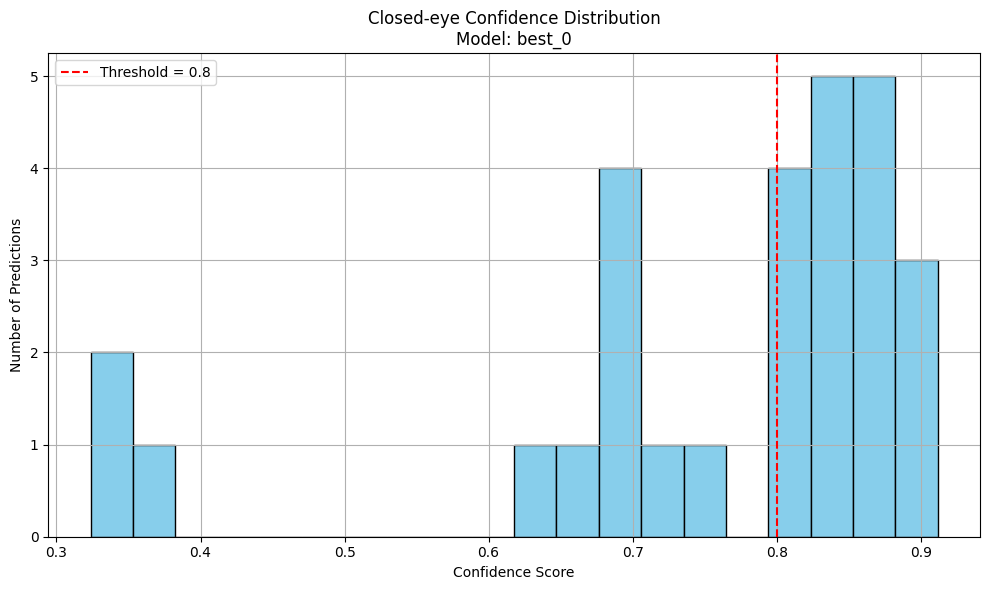


===================== Evaluating: best_1 =====================



Inference with best_1: 100%|██████████| 400/400 [00:11<00:00, 33.56it/s]



========== Detection Summary ==========
Left eye closed (conf ≥ 0.8):  21 / 200 = 10.50%

📌 Images predicted as closed eyes (28):
  - left_400007.png | left_eye_close | confidence: 0.59
  - left_400008.png | left_eye_close | confidence: 0.90
  - left_400009.png | left_eye_close | confidence: 0.84
  - left_400010.png | left_eye_close | confidence: 0.88
  - left_400017.png | left_eye_close | confidence: 0.87
  - left_400018.png | left_eye_close | confidence: 0.80
  - left_400019.png | left_eye_close | confidence: 0.36
  - left_400032.png | left_eye_close | confidence: 0.75
  - left_400098.png | left_eye_close | confidence: 0.86
  - left_400099.png | left_eye_close | confidence: 0.88
  - left_400103.png | left_eye_close | confidence: 0.90
  - left_400104.png | left_eye_close | confidence: 0.91
  - left_400105.png | left_eye_close | confidence: 0.89
  - left_400137.png | left_eye_close | confidence: 0.44
  - left_400138.png | left_eye_close | confidence: 0.89
  - left_400139.png | left_ey

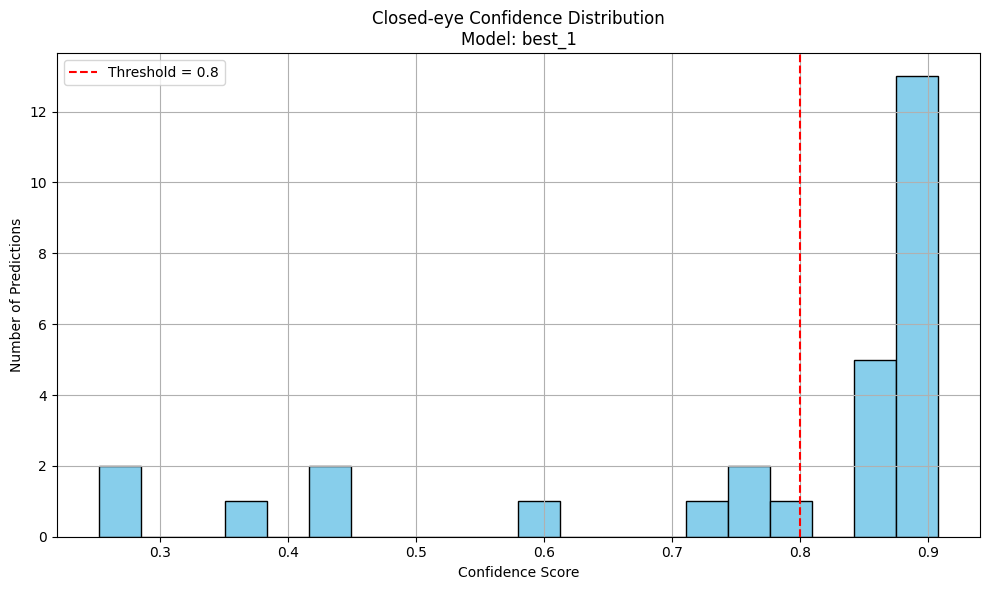


===================== Evaluating: best_2 =====================



Inference with best_2: 100%|██████████| 400/400 [00:11<00:00, 34.57it/s]



========== Detection Summary ==========
Left eye closed (conf ≥ 0.8):  24 / 200 = 12.00%

📌 Images predicted as closed eyes (34):
  - left_400007.png | left_eye_close | confidence: 0.51
  - left_400008.png | left_eye_close | confidence: 0.84
  - left_400009.png | left_eye_close | confidence: 0.87
  - left_400010.png | left_eye_close | confidence: 0.86
  - left_400011.png | left_eye_close | confidence: 0.25
  - left_400016.png | left_eye_close | confidence: 0.53
  - left_400017.png | left_eye_close | confidence: 0.84
  - left_400018.png | left_eye_close | confidence: 0.84
  - left_400019.png | left_eye_close | confidence: 0.80
  - left_400020.png | left_eye_close | confidence: 0.80
  - left_400021.png | left_eye_close | confidence: 0.59
  - left_400031.png | left_eye_close | confidence: 0.35
  - left_400032.png | left_eye_close | confidence: 0.45
  - left_400098.png | left_eye_close | confidence: 0.88
  - left_400099.png | left_eye_close | confidence: 0.82
  - left_400102.png | left_ey

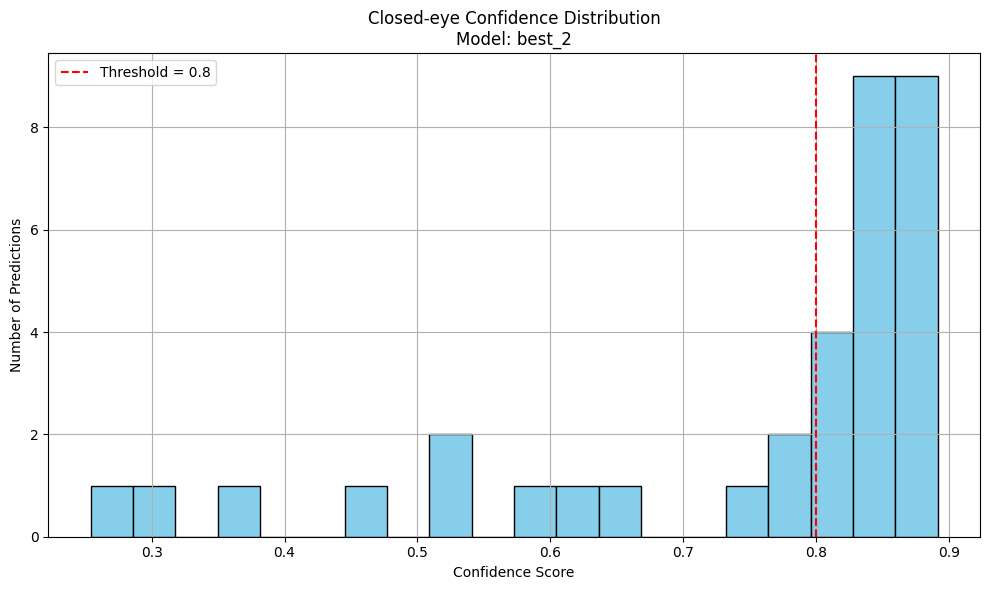

In [3]:
from ultralytics import YOLO
import os
import shutil
from tqdm import tqdm
import matplotlib.pyplot as plt

# ✅ 模型路径列表
model_paths = [
    r'C:\TUB\Projekt\Version1\model\best_0.pt',
    r'C:\TUB\Projekt\Version1\model\best_1.pt',
    r'C:\TUB\Projekt\Version1\model\best_2.pt'
]

# ✅ 测试图像路径
image_dir = r'C:\TUB\Projekt\Version1\test_dataset_half'

# ✅ 类别定义
right_eye_closed_class = 0
left_eye_closed_class = 2
confidence_threshold = 0.8

# ✅ 所有图像路径
image_paths = sorted([
    os.path.join(image_dir, f)
    for f in os.listdir(image_dir)
    if f.lower().endswith(('.jpg', '.png'))
])

print(f"\n🔍 Total images detected: {len(image_paths)}\n")

# ✅ 多模型推理
for model_path in model_paths:
    model_name = os.path.splitext(os.path.basename(model_path))[0]
    print(f"\n===================== Evaluating: {model_name} =====================\n")
    model = YOLO(model_path)
    output_dir = os.path.join(os.path.dirname(image_dir), f'closed_eye_{model_name}')
    os.makedirs(output_dir, exist_ok=True)

    left_total = 0
    left_closed = 2
    closed_predictions = []

    for path in tqdm(image_paths, desc=f"Inference with {model_name}"):
        filename = os.path.basename(path).lower()

        if filename.startswith("left_"):
            left_total += 1
            target_class = left_eye_closed_class
        elif filename.startswith("right_"):
            continue  # 只做左眼
        else:
            continue

        results = model(path, verbose=False, conf=0.25)[0]

        if results.boxes and results.boxes.cls is not None:
            classes = results.boxes.cls.cpu().numpy()
            confs = results.boxes.conf.cpu().numpy()

            for cls_id, conf in zip(classes, confs):
                cls_id = int(cls_id)
                if cls_id == target_class:
                    closed_predictions.append((filename, model.names[cls_id], conf))

                    if conf >= confidence_threshold:
                        # ✅ 拷贝图片
                        dst_path = os.path.join(output_dir, filename)
                        shutil.copy2(path, dst_path)
                        left_closed += 1

    # ✅ 打印统计
    print("\n========== Detection Summary ==========")
    if left_total:
        print(f"Left eye closed (conf ≥ {confidence_threshold}):  {left_closed} / {left_total} = {left_closed / left_total:.2%}")
    else:
        print("⚠️ No left eye images found!")

    print(f"\n📌 Images predicted as closed eyes ({len(closed_predictions)}):")
    for fname, cls_name, conf in closed_predictions:
        print(f"  - {fname} | {cls_name} | confidence: {conf:.2f}")

    # ✅ 画图
    confidence_scores = [conf for _, _, conf in closed_predictions]

    if confidence_scores:
        plt.figure(figsize=(10, 6))
        plt.hist(confidence_scores, bins=20, color='skyblue', edgecolor='black')
        plt.axvline(x=confidence_threshold, color='red', linestyle='--', label=f'Threshold = {confidence_threshold}')
        plt.title(f'Closed-eye Confidence Distribution\nModel: {model_name}')
        plt.xlabel('Confidence Score')
        plt.ylabel('Number of Predictions')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ 没有闭眼预测，跳过可视化。")


In [4]:
import shutil

# ✅ 设置保存高置信度闭眼图像的目录
output_dir = r'C:\TUB\Projekt\Version1\closed_eye_high_conf'
os.makedirs(output_dir, exist_ok=True)

# ✅ 提取高置信度闭眼图像（置信度 ≥ 0.8）
high_conf_threshold = 0.8
high_conf_count = 0

for fname, cls_name, conf in closed_predictions:
    if conf >= high_conf_threshold:
        src_path = os.path.join(image_dir, fname)
        dst_path = os.path.join(output_dir, fname)
        try:
            shutil.copy2(src_path, dst_path)
            high_conf_count += 1
        except Exception as e:
            print(f"❌ 复制失败: {fname} | 错误: {e}")

# ✅ 统计结果
print(f"\n✅ 提取完成: 共 {high_conf_count} 张闭眼图像 (置信度 ≥ {high_conf_threshold}) 已保存到：")
print(f"   {output_dir}")



✅ 提取完成: 共 22 张闭眼图像 (置信度 ≥ 0.8) 已保存到：
   C:\TUB\Projekt\Version1\closed_eye_high_conf


In [18]:
from ultralytics import YOLO
import os
import shutil
from tqdm import tqdm

# ✅ 加载两个模型
model0 = YOLO(r'C:\TUB\Projekt\Version1\model\best_0.pt')
model1 = YOLO(r'C:\TUB\Projekt\Version1\model\best_1.pt')

# ✅ 类别与阈值设置
left_eye_closed_class = 2
conf_threshold = 0.8

# ✅ 输入图像路径
image_dir = r'C:\TUB\Projekt\Version1\left_eye\images'
image_paths = sorted([
    os.path.join(image_dir, f)
    for f in os.listdir(image_dir)
    if f.lower().endswith(('.jpg', '.png')) and f.lower().startswith("left_")
])

# ✅ 输出路径设置
base_output = r'C:\TUB\Projekt\Version1\fusion_results'
closed_dir = os.path.join(base_output, 'voted_closed')
uncertain_dir = os.path.join(base_output, 'voted_uncertain')
non_closed_dir = os.path.join(base_output, 'voted_non_closed')

os.makedirs(closed_dir, exist_ok=True)
os.makedirs(uncertain_dir, exist_ok=True)
os.makedirs(non_closed_dir, exist_ok=True)

# ✅ 记录统计
final_closed = []
uncertain = []
non_closed = []

for path in tqdm(image_paths, desc="Fusion Voting"):
    filename = os.path.basename(path)

    # 推理：model0
    res0 = model0(path, verbose=False, conf=0.25)[0]
    cls0 = res0.boxes.cls.cpu().numpy() if res0.boxes.cls is not None else []
    conf0 = res0.boxes.conf.cpu().numpy() if res0.boxes.conf is not None else []
    pred0 = [(c, s) for c, s in zip(cls0, conf0) if int(c) == left_eye_closed_class]

    # 推理：model1
    res1 = model1(path, verbose=False, conf=0.25)[0]
    cls1 = res1.boxes.cls.cpu().numpy() if res1.boxes.cls is not None else []
    conf1 = res1.boxes.conf.cpu().numpy() if res1.boxes.conf is not None else []
    pred1 = [(c, s) for c, s in zip(cls1, conf1) if int(c) == left_eye_closed_class]

    # 判断
    is_closed_0 = len(pred0) > 0
    is_closed_1 = len(pred1) > 0
    max_conf_0 = max([s for _, s in pred0], default=0)
    max_conf_1 = max([s for _, s in pred1], default=0)

    # ✅ 投票规则
    if is_closed_0 and is_closed_1 and (max_conf_0 >= conf_threshold or max_conf_1 >= conf_threshold):
        final_closed.append(filename)
        dst_path = os.path.join(closed_dir, filename)
    elif is_closed_0 or is_closed_1:
        uncertain.append(filename)
        dst_path = os.path.join(uncertain_dir, filename)
    else:
        non_closed.append(filename)
        dst_path = os.path.join(non_closed_dir, filename)

    # ✅ 拷贝图像
    shutil.copy2(path, dst_path)

# ✅ 打印统计结果
print("\n=========== 投票融合结果 ===========")
print(f"✅ 真闭眼（双模型支持）：{len(final_closed)} 张图像")
print(f"❓ 模糊/不确定（单模型支持）：{len(uncertain)} 张图像")
print(f"❌ 非闭眼（无模型支持）：{len(non_closed)} 张图像")
print(f"\n图像已导出至：{base_output}")


Fusion Voting: 100%|██████████| 200/200 [00:20<00:00,  9.80it/s]


=========== 投票融合结果 ===========
✅ 真闭眼（双模型支持）：19 张图像
❓ 模糊/不确定（单模型支持）：11 张图像
❌ 非闭眼（无模型支持）：170 张图像

图像已导出至：C:\TUB\Projekt\Version1\fusion_results
